# Donovan's Coded Analysis
## Business Understanding
**The goal of this analysis is not to maximize income prediction accuracy, but to investigate whether the Adult Income dataset encodes social and structural biases that could lead to unfair outcomes when used in machine learning models.** 

Specifically, we aim to:

- Identify disparities across protected attributes (sex, race)

- Detect proxy variables that indirectly encode protected information

- Examine whether individuals with similar qualifications receive different outcomes

- Assess how modeling decisions could amplify existing inequities

## Data Understanding

**About the Data**

Shape:
- Rows: 32,561

- Columns: 15

Features include:

- Demographics: age, sex, race, native-country

- Socioeconomic: education, occupation, workclass, hours-per-week

- Relationship indicators: marital-status, relationship

Protected Attributes:

- sex

- race

Potential Proxy 

*These variables may indirectly encode protected attributes*:

- occupation

- education-num

- marital-status

- workclass

- hours-per-week


## Data Prep and Data Exploration 
Decided to group them together, usually I don't do this, but what the heck there is a first for everything

In [ ]:
#ahh yes importing the normal libraries as always, how interesting 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')

In [ ]:
#reading the dataset and putting it in a df, copied ethans for this since he was ahead of the game
df = pd.read_csv('../data/adult.csv')

In [18]:
#Taking a little peak at our data and the data types
#Looks like we hvae 32k + entries, need to check for any potential nulls in here and the normal data exploriatory steps 
#Also knew some of this due to kaggle and some of the info is listed above in data understanding

display(df.shape)
display(df.head())
display(df.describe())
df.info()


(32561, 15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Looks like we have ?s for missing data, shape matches what kaggle had, all dtypes are how they should be except for income, might need to change that later and normalize it to scale with the other values.

Age:
Age spans nearly the full working lifespan, making it a strong income predictor while also introducing potential age-related bias if not carefully interpreted.

fnlwgt:
The wide range of final weights reflects census sampling adjustments and must be handled cautiously, as improper use can distort population-level and fairness analyses.

education.num:
Education level shows moderate spread and serves as a key socioeconomic indicator that may also act as a proxy for structural inequality across demographic groups.

capital.gain:
Capital gains are highly right-skewed, indicating that wealth-based income is concentrated among a small subset of individuals and can disproportionately influence model predictions.

capital.loss:
Capital losses are rare and unevenly distributed, reflecting financial behaviors tied to asset ownership that may encode underlying economic disparities.

hours.per.week:
Hours worked cluster around a standard full-time schedule but vary widely, capturing labor intensity while also reflecting systemic differences in occupational and caregiving constraints.

In [ ]:
df.isnull().sum()
#Looks like there are no null values, buuuuut I did see some question marks and a little curious on that

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
#Checking out the columns that have question marks and seeing if I need to replace these with null or something else that would make sense there
(df == "?").sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [ ]:
#taking a look at the question marks and diving deeper

issing_mask = (df == "?").any(axis=1)
df_missing = df[missing_mask]
df_missing


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
display(df_missing.groupby("race").size().to_frame("missing_count"))
display(df_missing["race"].value_counts(normalize=True))
df_missing.groupby("sex").size().to_frame("missing_count")
#looks like the m

,missing_count
race,
Amer-Indian-Eskimo,25
Asian-Pac-Islander,144
Black,307
Other,40
White,1883


race
White                 0.784910
Black                 0.127970
Asian-Pac-Islander    0.060025
Other                 0.016674
Amer-Indian-Eskimo    0.010421
Name: proportion, dtype: float64

,missing_count
sex,
Female,989
Male,1410


In [ ]:
#group with most missing values in male and the most missing values being the white race

In [ ]:
#After looking at the data with the missing counts I wanted to see the groups by race and sex

group_counts = (
    df.groupby(["race", "sex"])
      .size()
      .reset_index(name="count")
)

group_counts

#looking at the group counts white males and females are dominating this dataset showing a big bias towards them

,race,sex,count
0,Amer-Indian-Eskimo,Female,119
1,Amer-Indian-Eskimo,Male,192
2,Asian-Pac-Islander,Female,346
3,Asian-Pac-Islander,Male,693
4,Black,Female,1555
5,Black,Male,1569
6,Other,Female,109
7,Other,Male,162
8,White,Female,8642
9,White,Male,19174


In [ ]:
group_norm_total = (
    df.groupby(["race", "sex"])
      .size()
      .div(len(df))
      .reset_index(name="proportion")
)

group_norm_total

#looking at the percentages almost 60% of this entire data set is white males with 26.5% being white females taking up the second most.
#making female amer-indian_Eskimos the most unproportional to this dataset, being the rare and imbalanced race and sex. With only 0.366% represented.

,race,sex,proportion
0,Amer-Indian-Eskimo,Female,0.003655
1,Amer-Indian-Eskimo,Male,0.005897
2,Asian-Pac-Islander,Female,0.010626
3,Asian-Pac-Islander,Male,0.021283
4,Black,Female,0.047757
5,Black,Male,0.048186
6,Other,Female,0.003348
7,Other,Male,0.004975
8,White,Female,0.265410
9,White,Male,0.588864


In [ ]:
#Since I goruped the datasets proportion, I wanted to see income and the count by race and sex

race_sex_income_counts = (
    df.groupby(["race", "sex", "income"])
      .size()
      .reset_index(name="count")
      .sort_values(by="count", ascending=False)
)

race_sex_income_counts




,race,sex,income,count
18,White,Male,<=50K,13085
16,White,Female,<=50K,7614
19,White,Male,>50K,6089
8,Black,Female,<=50K,1465
10,Black,Male,<=50K,1272
17,White,Female,>50K,1028
6,Asian-Pac-Islander,Male,<=50K,460
4,Asian-Pac-Islander,Female,<=50K,303
11,Black,Male,>50K,297
7,Asian-Pac-Islander,Male,>50K,233


In [50]:
edu_income_within = (
    df.groupby(["education", "income"])
      .size()
      .reset_index(name="count")
      .groupby("education", as_index=False)
      .apply(lambda x: x.assign(
          proportion=x["count"] / x["count"].sum()
      ))
      .reset_index(drop=True)
      .sort_values(by="proportion", ascending=False)
)

edu_income_within


C:\Users\Donovan\AppData\Local\Temp\ipykernel_13144\1253999393.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


,education,income,count,proportion
26,Preschool,<=50K,51,1.000000
6,1st-4th,<=50K,162,0.964286
8,5th-6th,<=50K,317,0.951952
2,11th,<=50K,1115,0.948936
12,9th,<=50K,487,0.947471
10,7th-8th,<=50K,606,0.938080
0,10th,<=50K,871,0.933548
4,12th,<=50K,400,0.923788
22,HS-grad,<=50K,8826,0.840491
29,Some-college,<=50K,5904,0.809765


In [ ]:
rse_income_within = (
    df.groupby(["race", "sex", "education", "income"])
      .size()
      .reset_index(name="count")
      .groupby(["race", "sex", "education"], as_index=False)
      .apply(lambda x: x.assign(
          proportion=x["count"] / x["count"].sum()
      ))
      .reset_index(drop=True)
      .sort_values(by="proportion", ascending=False)
)

rse_income_within[rse_income_within["count"] >= 100]

#now adding everything together, grouping all by race, sex,education, and income based on groups with a count of 100 or higher


C:\Users\Donovan\AppData\Local\Temp\ipykernel_13144\2848436787.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


,race,sex,education,income,count,proportion
196,White,Female,7th-8th,<=50K,117,0.991525
188,White,Female,10th,<=50K,213,0.990698
190,White,Female,11th,<=50K,325,0.984848
192,White,Female,12th,<=50K,108,0.981818
108,Black,Female,HS-grad,<=50K,557,0.978910
115,Black,Female,Some-college,<=50K,383,0.959900
225,White,Male,5th-6th,<=50K,204,0.944444
229,White,Male,9th,<=50K,283,0.940199
219,White,Male,11th,<=50K,602,0.930448
215,White,Female,Some-college,<=50K,2095,0.923314


In [ ]:
#income based on groups with a count of  50 - 25  
rse_income_filtered = rse_income_within[
    (rse_income_within["count"] >= 25) &
    (rse_income_within["count"] <= 50)
]

rse_income_filtered

,race,sex,education,income,count,proportion
159,Other,Female,HS-grad,<=50K,27,1.000000
194,White,Female,1st-4th,<=50K,31,1.000000
98,Black,Female,7th-8th,<=50K,28,1.000000
99,Black,Female,9th,<=50K,32,1.000000
243,White,Male,Preschool,<=50K,26,1.000000
17,Amer-Indian-Eskimo,Female,Some-college,<=50K,36,0.972973
180,Other,Male,HS-grad,<=50K,49,0.960784
13,Amer-Indian-Eskimo,Female,HS-grad,<=50K,34,0.944444
121,Black,Male,12th,<=50K,41,0.931818
126,Black,Male,7th-8th,<=50K,26,0.928571


In [ ]:
#income based on groups with a count of  25 - 10

rse_income_filtered = rse_income_within[
    (rse_income_within["count"] >= 10) &
    (rse_income_within["count"] <= 25)
]

rse_income_filtered

,race,sex,education,income,count,proportion
41,Asian-Pac-Islander,Female,11th,<=50K,11,1.000000
125,Black,Male,5th-6th,<=50K,13,1.000000
212,White,Female,Preschool,<=50K,12,1.000000
171,Other,Male,7th-8th,<=50K,10,1.000000
19,Amer-Indian-Eskimo,Male,10th,<=50K,10,1.000000
167,Other,Male,12th,<=50K,10,1.000000
162,Other,Female,Some-college,<=50K,24,0.960000
94,Black,Female,12th,<=50K,24,0.923077
7,Amer-Indian-Eskimo,Female,Assoc-voc,<=50K,12,0.923077
51,Asian-Pac-Islander,Female,Assoc-voc,<=50K,10,0.909091


In [ ]:
#income based on groups with a count of  9 - 1

rse_income_filtered = rse_income_within[
    (rse_income_within["count"] >= 1) &
    (rse_income_within["count"] <= 9)
]

rse_income_filtered

,race,sex,education,income,count,proportion
0,Amer-Indian-Eskimo,Female,10th,<=50K,6,1.000000
153,Other,Female,9th,<=50K,4,1.000000
147,Other,Female,10th,<=50K,5,1.000000
148,Other,Female,11th,<=50K,6,1.000000
149,Other,Female,12th,<=50K,4,1.000000
...,...,...,...,...,...,...
18,Amer-Indian-Eskimo,Female,Some-college,>50K,1,0.027027
193,White,Female,12th,>50K,2,0.018182
191,White,Female,11th,>50K,5,0.015152
189,White,Female,10th,>50K,2,0.009302


**Analysis of the above.**

The grouped analysis reveals that the dataset is heavily dominated by White individuals, particularly White males, who alone make up the majority of the sample and account for most high-income observations. In contrast, nearly all other race sex groups represent only a small fraction of the data, with several groups appearing in very limited numbers. When income is examined by race and sex, the ≤50K category overwhelmingly dominates across all groups, but high-income outcomes are far more concentrated among White males, while Black individuals, Amer-Indian-Eskimo groups, and those categorized as “Other” rarely appear in the >50K category. Education shows a strong relationship with income, as lower education levels are almost entirely associated with ≤50K earnings, while higher degrees such as Master’s, Professional School, and Doctorate correspond to much higher proportions of >50K income. However, when race and sex are combined with education, income disparities still persist, with White males consistently having better income outcomes than similarly educated women and racial minorities. Additionally, many race–sex–education combinations contain relatively small sample sizes, which can produce extreme proportions and highlights the risk of drawing conclusions from sparse data. Overall, these patterns suggest that the dataset reflects structural inequalities in both representation and income distribution, which could be learned and reinforced by predictive models if fairness considerations are not explicitly addressed.

<Figure size 1000x600 with 0 Axes>

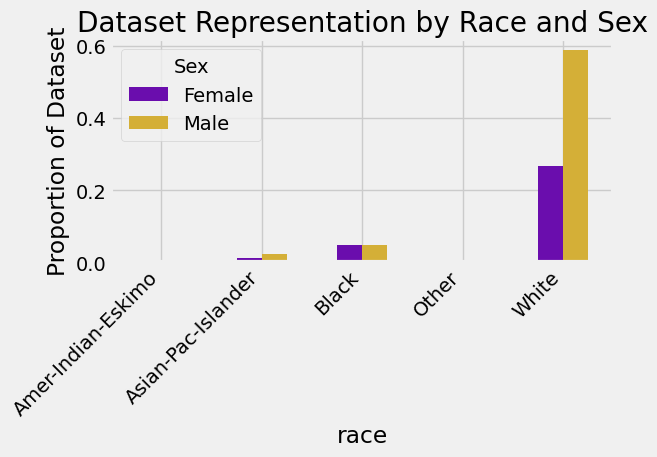

C:\Users\Donovan\AppData\Local\Temp\ipykernel_13144\1043007273.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


<Figure size 1200x600 with 0 Axes>

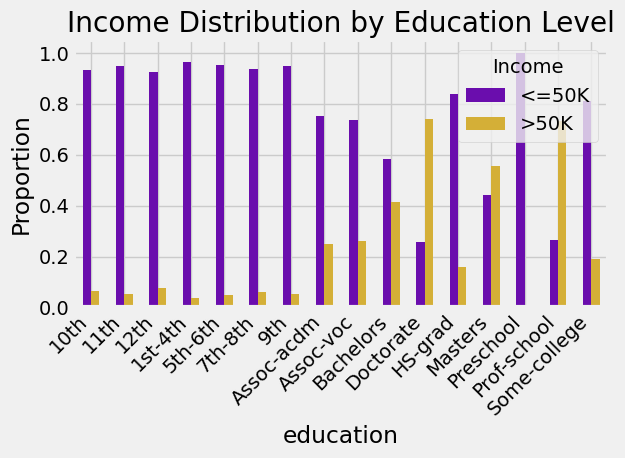

In [ ]:
# Creating some visuals based on the information above
purple = "#6A0DAD"
gold = "#D4AF37"
#This section is the reprentation of the data from race and sex
race_sex = (
    df.groupby(["race", "sex"])
      .size()
      .reset_index(name="count")
      .assign(proportion=lambda x: x["count"] / x["count"].sum())
)

race_sex_pivot = race_sex.pivot(index="race", columns="sex", values="proportion")

plt.figure(figsize=(10, 6))
race_sex_pivot.plot(kind="bar", color=[purple, gold])
plt.ylabel("Proportion of Dataset")
plt.title("Dataset Representation by Race and Sex")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


# This section is normalized incomce based on education and income
edu_income = (
    df.groupby(["education", "income"])
      .size()
      .reset_index(name="count")
      .groupby("education", as_index=False)
      .apply(lambda x: x.assign(
          proportion=x["count"] / x["count"].sum()
      ))
      .reset_index(drop=True)
)

edu_income_pivot = edu_income.pivot(
    index="education",
    columns="income",
    values="proportion"
)

plt.figure(figsize=(12, 6))
edu_income_pivot.plot(kind="bar", color=[purple, gold])
plt.ylabel("Proportion")
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Income")
plt.tight_layout()
plt.show()



In [ ]:
#Creating variables for modeling
df["income_binary"] = df["income"].map({
    "<=50K": 0,
    ">50K": 1
})# makes these two easier to predict

protected_cols = ["race", "sex"]

feature_cols = [
    "age",
    "education.num",
    "hours.per.week",
    "capital.gain",
    "capital.loss",
    "workclass",
    "occupation",
    "marital.status"
]


## Modeling

Purpose of modeling
The objective of this modeling phase is to not optimize the model's predictive performance. Doing so to examine how different modeling vhoices interact with the demographic structure of the dataet. Using this to reinforce the potential biases in this dataset. These will be diagnostic tools and not decison making models.


Model A: Predict income using race + sex only → shows explicit bias

Model B: Predict income using education only → shows proxy bias

Model C: Predict income using education + race + sex → shows amplification

In [109]:
#more libraries to import for out modeling sectioin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [ ]:

#our fancy target variable 
y = df["income_binary"]


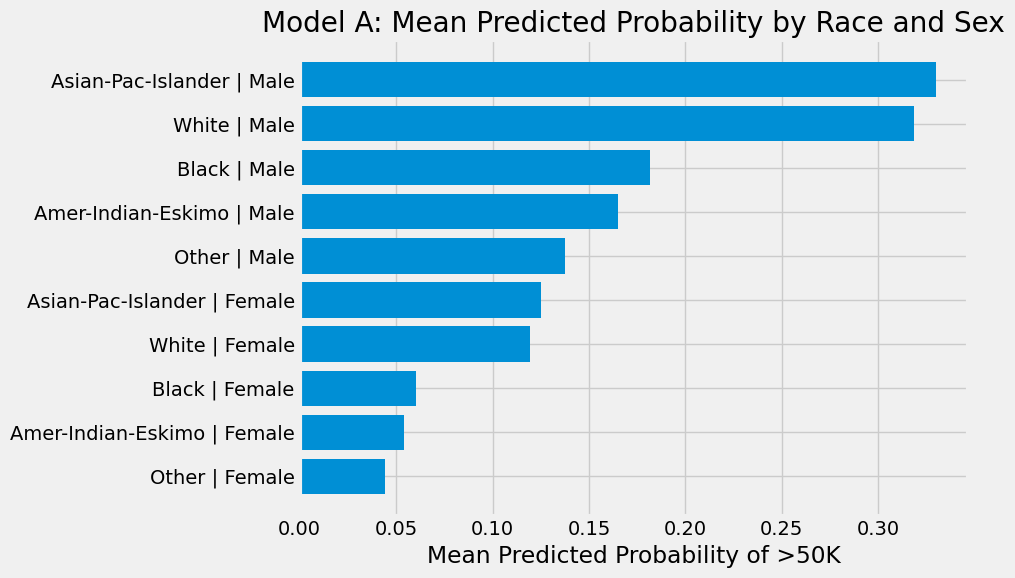

,race,sex,pred_prob,group
3,Asian-Pac-Islander,Male,0.329971,Asian-Pac-Islander | Male
9,White,Male,0.318394,White | Male
5,Black,Male,0.181658,Black | Male
1,Amer-Indian-Eskimo,Male,0.165008,Amer-Indian-Eskimo | Male
7,Other,Male,0.137623,Other | Male
2,Asian-Pac-Islander,Female,0.125171,Asian-Pac-Islander | Female
8,White,Female,0.119498,White | Female
4,Black,Female,0.060586,Black | Female
0,Amer-Indian-Eskimo,Female,0.054297,Amer-Indian-Eskimo | Female
6,Other,Female,0.044311,Other | Female


In [110]:
#Model A

# 1) Features and target
X_demo = df[["race", "sex"]]
y = df["income_binary"]

# 2) Split
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_demo, y, test_size=0.30, stratify=y, random_state=42
)

# 3) Preprocess + Model
prep_demo = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["race", "sex"])
    ]
)

model_demo = Pipeline([
    ("prep", prep_demo),
    ("logit", LogisticRegression(max_iter=1000))
])

# 4) Fit
model_demo.fit(X_train_demo, y_train_demo)

# 5) Predicted probabilities on test set
df_demo_eval = df.loc[X_test_demo.index, ["race", "sex"]].copy()
df_demo_eval["pred_prob"] = model_demo.predict_proba(X_test_demo)[:, 1]

# 6) Group means
means_demo = (
    df_demo_eval.groupby(["race", "sex"])["pred_prob"]
    .mean()
    .reset_index()
    .sort_values("pred_prob", ascending=False)
)

# 7) Plot
means_demo["group"] = means_demo["race"] + " | " + means_demo["sex"]

plt.figure(figsize=(10, 6))
plt.barh(means_demo["group"], means_demo["pred_prob"])
plt.xlabel("Mean Predicted Probability of >50K")
plt.title("Model A: Mean Predicted Probability by Race and Sex")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

means_demo


This plot shows that predicted income probabilities differ across race and sex even though the model only uses these demographic variables. Groups with higher mean probabilities are consistently treated as more likely to earn above $50K, which demonstrates explicit demographic bias in the model outputs.

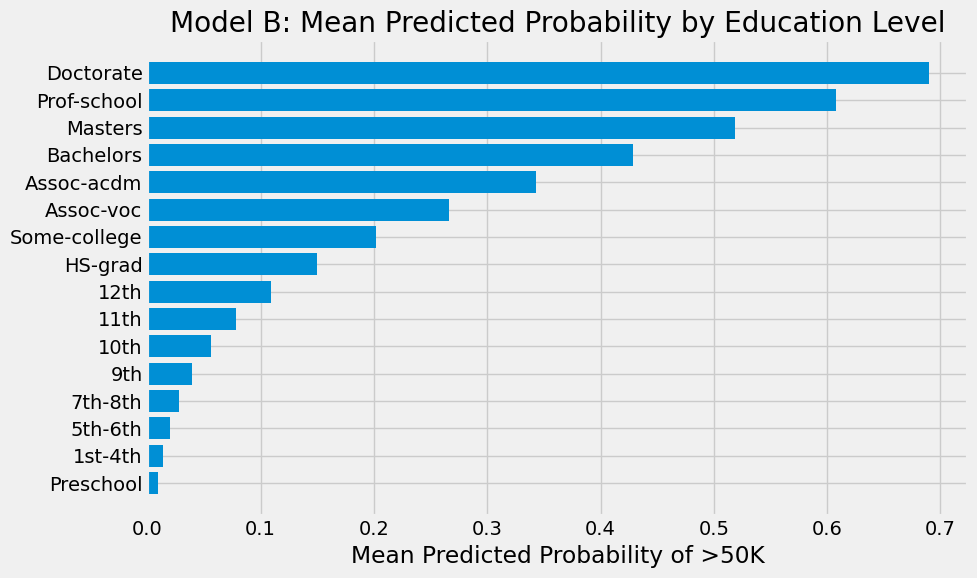

,education,pred_prob
10,Doctorate,0.689849
14,Prof-school,0.607559
12,Masters,0.518670
9,Bachelors,0.428583
7,Assoc-acdm,0.342994
8,Assoc-voc,0.266524
15,Some-college,0.201865
11,HS-grad,0.149691
2,12th,0.109157
1,11th,0.078585


In [111]:
#Model B

# 1) Features and target
X_edu = df[["education.num"]]
y = df["income_binary"]

# 2) Split
X_train_edu, X_test_edu, y_train_edu, y_test_edu = train_test_split(
    X_edu, y, test_size=0.30, stratify=y, random_state=42
)

# 3) Model
model_edu = LogisticRegression(max_iter=1000)

# 4) Fit
model_edu.fit(X_train_edu, y_train_edu)

# 5) Predicted probabilities on test set
df_edu_eval = df.loc[X_test_edu.index, ["education"]].copy()
df_edu_eval["pred_prob"] = model_edu.predict_proba(X_test_edu)[:, 1]

# 6) Group means by education level
means_edu = (
    df_edu_eval.groupby("education")["pred_prob"]
    .mean()
    .reset_index()
    .sort_values("pred_prob", ascending=False)
)

# 7) Plot
plt.figure(figsize=(10, 6))
plt.barh(means_edu["education"], means_edu["pred_prob"])
plt.xlabel("Mean Predicted Probability of >50K")
plt.title("Model B: Mean Predicted Probability by Education Level")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

means_edu


The education only model assigns much higher predicted income probabilities to advanced degrees and very low probabilities to lower education levels. Because educational attainment is not evenly distributed across demographic groups, education can function as a proxy variable and reproduce inequality in predicted outcomes.

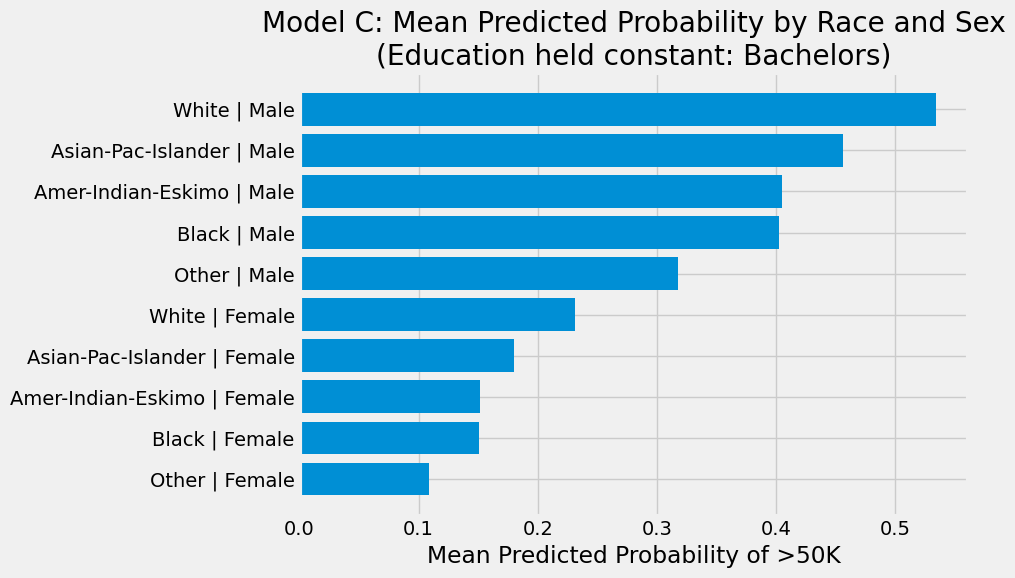

,race,sex,pred_prob,group
9,White,Male,0.534742,White | Male
3,Asian-Pac-Islander,Male,0.456373,Asian-Pac-Islander | Male
1,Amer-Indian-Eskimo,Male,0.405201,Amer-Indian-Eskimo | Male
5,Black,Male,0.402769,Black | Male
7,Other,Male,0.318100,Other | Male
8,White,Female,0.231694,White | Female
2,Asian-Pac-Islander,Female,0.180508,Asian-Pac-Islander | Female
0,Amer-Indian-Eskimo,Female,0.151639,Amer-Indian-Eskimo | Female
4,Black,Female,0.150344,Black | Female
6,Other,Female,0.109051,Other | Female


In [112]:
#Model C


# 1) Features and target
X_full = df[["education.num", "race", "sex"]]
y = df["income_binary"]

# 2) Split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.30, stratify=y, random_state=42
)

# 3) Preprocess + Model
prep_full = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["race", "sex"]),
        ("num", "passthrough", ["education.num"])
    ]
)

model_full = Pipeline([
    ("prep", prep_full),
    ("logit", LogisticRegression(max_iter=1000))
])

# 4) Fit
model_full.fit(X_train_full, y_train_full)

# 5) Predicted probabilities on test set
df_full_eval = df.loc[X_test_full.index, ["race", "sex", "education"]].copy()
df_full_eval["pred_prob"] = model_full.predict_proba(X_test_full)[:, 1]

# 6) Hold education constant (example: Bachelors)
edu_level = "Bachelors"
df_const = df_full_eval[df_full_eval["education"] == edu_level].copy()

means_full = (
    df_const.groupby(["race", "sex"])["pred_prob"]
    .mean()
    .reset_index()
    .sort_values("pred_prob", ascending=False)
)

# 7) Plot
means_full["group"] = means_full["race"] + " | " + means_full["sex"]

plt.figure(figsize=(10, 6))
plt.barh(means_full["group"], means_full["pred_prob"])
plt.xlabel("Mean Predicted Probability of >50K")
plt.title(f"Model C: Mean Predicted Probability by Race and Sex\n(Education held constant: {edu_level})")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

means_full


When education is held constant, predicted probabilities still vary by race and sex, which suggests that demographic differences persist beyond qualification differences. This indicates bias amplification, since adding demographic variables does not remove disparities but can reinforce them.

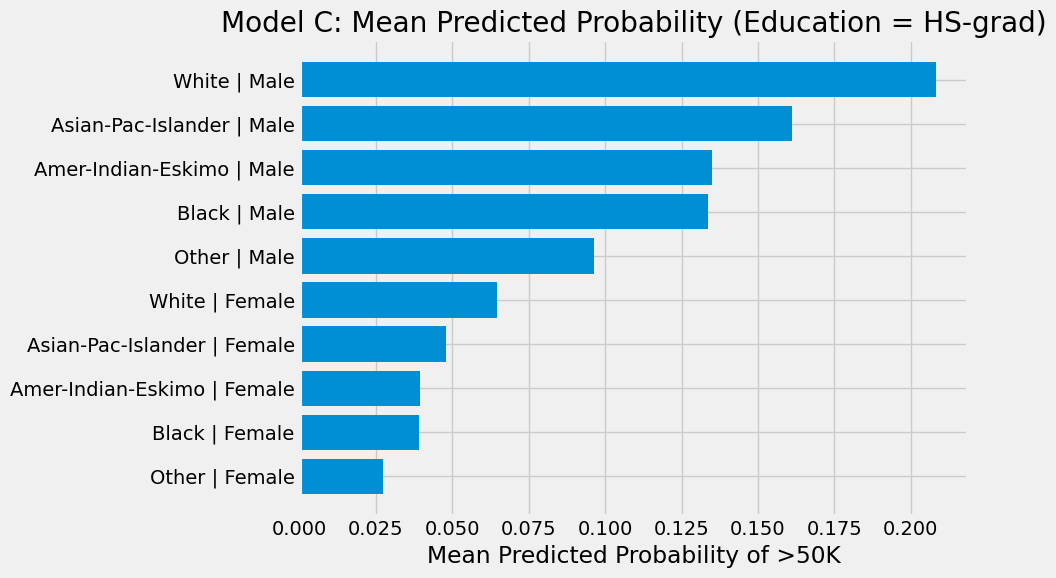

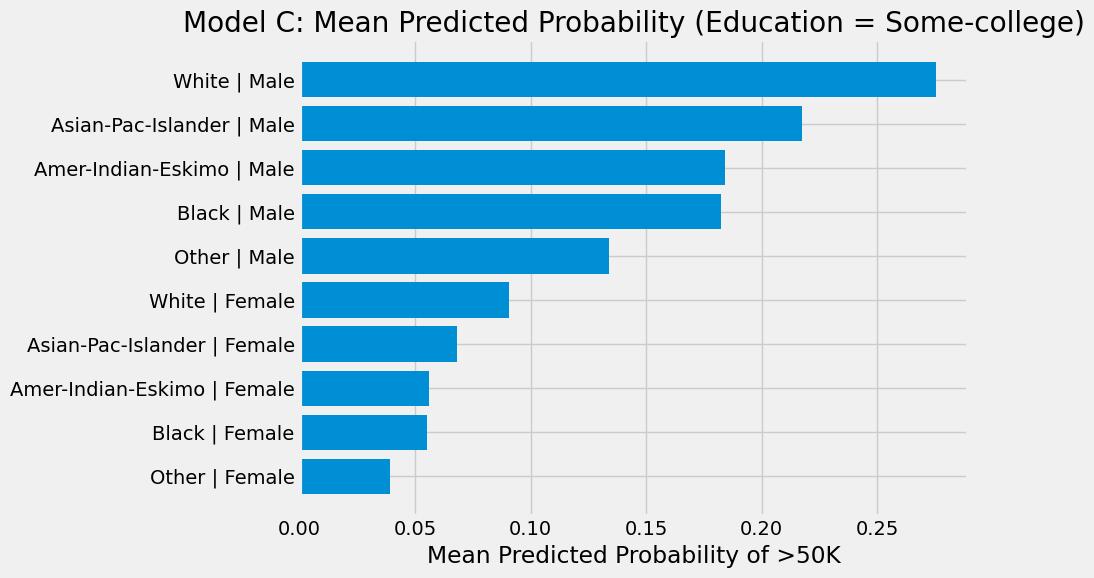

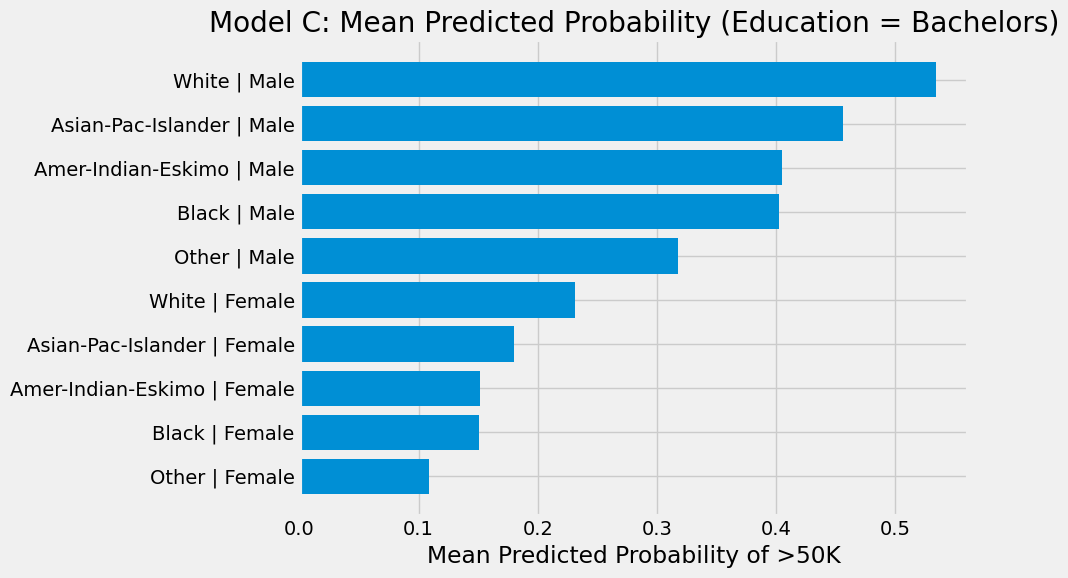

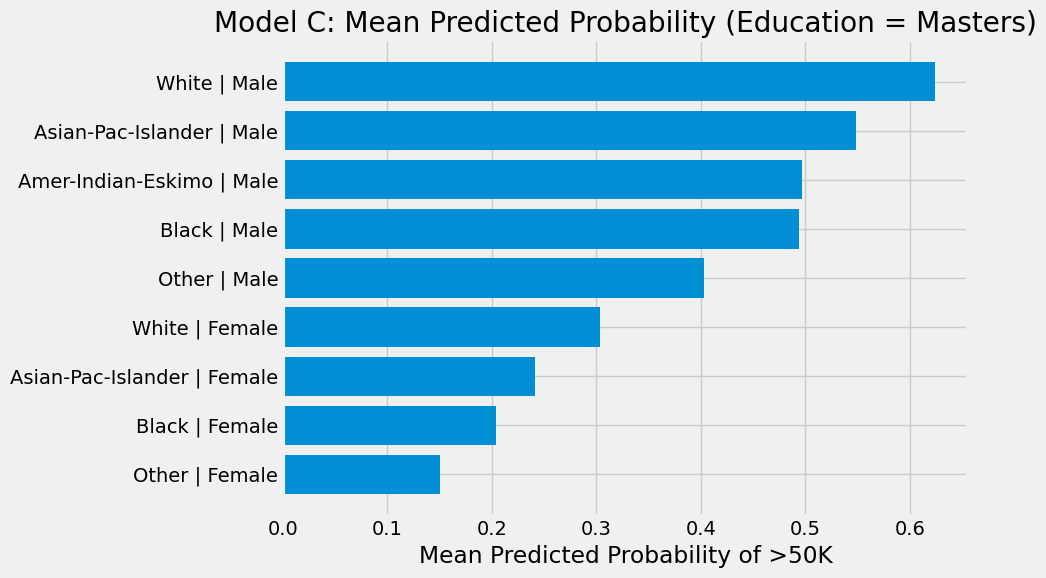

In [114]:
#Model C part 2 but for mulitple education levels
for edu_level in ["HS-grad", "Some-college", "Bachelors", "Masters"]:
    df_const = df_full_eval[df_full_eval["education"] == edu_level].copy()
    if len(df_const) < 100:
        continue

    means = (
        df_const.groupby(["race", "sex"])["pred_prob"]
        .mean()
        .reset_index()
        .sort_values("pred_prob", ascending=False)
    )

    means["group"] = means["race"] + " | " + means["sex"]

    plt.figure(figsize=(10, 6))
    plt.barh(means["group"], means["pred_prob"])
    plt.xlabel("Mean Predicted Probability of >50K")
    plt.title(f"Model C: Mean Predicted Probability (Education = {edu_level})")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In Model A, we used only race and sex, the mean predicted probabilities varieda a lot amongst all groups. This suggests that demographic characteristics alone can contain predictive signals for income, reflecting there being some underlying structural inequalities in the data and demonstrating explicit demographic bias within the dataset

In Model B, education was used as the only predictor. Educatin is typically viewed as a neutral and meaningful variable, the results show a strong increase in predicted income probability as education level rises.Access to higher education is not evenly distributed across demographic groups,this causes our model to demonstrates proxy bias, where a seemingly fair variable indirectly reproduces inequality, that it cannot see due to how we have the demographic gorups distributed and again going off the access to hgiher education.

In Model C, we put everything together, race, sex, and education were combined, and education was held constant when comparing groups. Even with the same level of education, predicted income probabilities still differed by race and sex. This indicated bias amplification, making this dataset show bias due to adding these demographic variables. The Bias was stronger since the demographic variables were present

The dings suggest that biased outcomes are driven by patterns in the data rather than model complexity. Looking at mean predicted probabilities rather than hard classifications allows for a clearer and more appropriate assessment of fairness, showing that excluding protected attributes or relying on proxy variables alone does not guarantee equal outocmes